In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
Question_Dict = {
    "Question1":"Do you help your fellow students/classmates with their studies  in a certain subject?",
    "Question2":"Peer tutoring is a practical thing to do to maintain their academic performance",
    "Question3":"Peer tutoring can help both students involved achieve their academic  goals",
    "Question4":"Both the tutor and the student being tutored can develop better communication and interpersonal skills through the tutoring process.",
    "Question5":"Peer tutoring is an opportunity to exchange ideas which can help me to have a deeper understanding with the subject matter",
    "Question6":"How does the duration of peer tutoring sessions corelate to academic improvement?",
    "Question7":"What challenges, if any, have you encountered during peer tutoring sessions, and how could they be addressed?",
    "Question8":"Have you noticed an improvement in your academic performance since engaging in peer tutoring?",
    "Queation9":"What role does student engagement play in the effectiveness of peer tutoring?",
    "Question10":"How does the feedback mechanism work within peer tutoring sessions contribute to continuous improvement in studies?",
    "Question11":"In what way peer tutoring contribute to critical thinking among students?",
    "Question12":"How does the structure of peer tutoring programs, such as one-on-one sessions versus group sessions, influence academic outcomes?",
    "Question13":"Does the tutor-tutee relationship impact learning outcomes?",
    "Question14":"How does the tutor's experience level influence academic improvements?",
    "Question15":"In conclusion, what is the end result of peer tutoring to you?"
}

In [4]:
df = pd.read_csv("Data.csv")
df.head()

,Timestamp,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,Question11,Question12,Question13,Question14,Question15
0,11/22/2023 6:56:16,Yes,Agree,Strongly agree,Strongly disagree,Strongly Agree,Positive Correlation,Time constraints,"Yes, significantly",Critical Factor,Essential for improvement,Significant Contribution,One-on-one sessions are more effective,Friends tutoring each other,Positive Correlation,It is really accessible and helpful to me
1,11/22/2023 7:02:20,Yes,Agree,Strongly agree,Neutral,Strongly Agree,Positive Correlation,Time constraints,"Yes, significantly",Critical Factor,Essential for improvement,Significant Contribution,Both one-on-one and group sessions are equally...,Friends tutoring each other,Positive Correlation,It is really accessible and helpful to me
2,11/22/2023 7:02:36,Yes,Agree,Agree,Agree,Agree,Positive Correlation,Time constraints,"Yes, moderately",Critical Factor,Essential for improvement,Significant Contribution,Group sessions are more effective,Friends tutoring each other,Positive Correlation,It is really accessible and helpful to me
3,11/22/2023 7:06:37,Yes,Agree,Agree,Agree,Agree,Positive Correlation,Communication barriers,"Yes, moderately",Moderately important,Essential for improvement,Moderate Contribution,One-on-one sessions are more effective,Randomly paired tutors and tutees,Positive Correlation,It is really accessible and helpful to me
4,11/22/2023 7:51:11,Yes,Agree,Strongly agree,Strongly disagree,Strongly Agree,Positive Correlation,Communication barriers,"Yes, significantly",Moderately important,Essential for improvement,Significant Contribution,Group sessions are more effective,Friends tutoring each other,Positive Correlation,It is really accessible and helpful to me


In [5]:
df["E1"]  = LabelEncoder().fit_transform(df['Question1'])
df["E2"]  = LabelEncoder().fit_transform(df['Question2'])
df["E3"]  = LabelEncoder().fit_transform(df['Question3'])
df['E4']  = LabelEncoder().fit_transform(df['Question4'])
df["E5"]  = LabelEncoder().fit_transform(df['Question5'])
df["E6"]  = LabelEncoder().fit_transform(df['Question6'])
df["E7"]  = LabelEncoder().fit_transform(df['Question7'])
df["E8"]  = LabelEncoder().fit_transform(df['Question8'])
df["E9"]  = LabelEncoder().fit_transform(df['Question9'])
df["E10"] = LabelEncoder().fit_transform(df['Question10'])
df["E11"] = LabelEncoder().fit_transform(df['Question11'])
df["E12"] = LabelEncoder().fit_transform(df['Question12'])
df["E13"] = LabelEncoder().fit_transform(df['Question13'])
df["E14"] = LabelEncoder().fit_transform(df['Question14'])
df["E15"] = LabelEncoder().fit_transform(df['Question15'])

In [6]:
df.head()

,Timestamp,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,...,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15
0,11/22/2023 6:56:16,Yes,Agree,Strongly agree,Strongly disagree,Strongly Agree,Positive Correlation,Time constraints,"Yes, significantly",Critical Factor,...,2,3,3,0,0,2,2,1,2,2
1,11/22/2023 7:02:20,Yes,Agree,Strongly agree,Neutral,Strongly Agree,Positive Correlation,Time constraints,"Yes, significantly",Critical Factor,...,2,3,3,0,0,2,0,1,2,2
2,11/22/2023 7:02:36,Yes,Agree,Agree,Agree,Agree,Positive Correlation,Time constraints,"Yes, moderately",Critical Factor,...,2,3,2,0,0,2,1,1,2,2
3,11/22/2023 7:06:37,Yes,Agree,Agree,Agree,Agree,Positive Correlation,Communication barriers,"Yes, moderately",Moderately important,...,2,0,2,2,0,0,2,2,2,2
4,11/22/2023 7:51:11,Yes,Agree,Strongly agree,Strongly disagree,Strongly Agree,Positive Correlation,Communication barriers,"Yes, significantly",Moderately important,...,2,0,3,2,0,2,1,1,2,2


Strongly agree    52.362205
Agree             40.551181
Neutral            5.905512
Disagree           1.181102
Name: Question3, dtype: float64


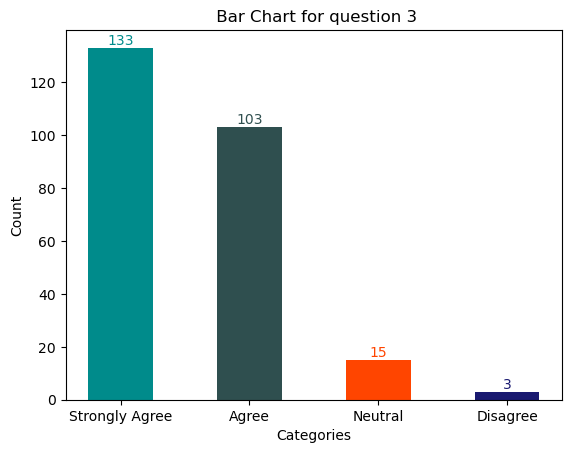

In [30]:
question3_counts = df['Question3'].value_counts(normalize=True) * 100
print(question3_counts)
categories = ['Strongly Agree', 'Agree', 'Neutral', 'Disagree']
counts = [133, 103, 15, 3]
colors = ['#008B8B', '#2F4F4F', '#FF4500', '#191970']

plt.bar(categories, counts, color=colors, width=0.5)

for category, count, color in zip(categories, counts, colors):
    plt.text(category, count, str(count), ha='center', va='bottom', color=color)

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title(' Bar Chart for question 3')

plt.show()

Agree                41.035857
Strongly agree       31.474104
Strongly disagree    17.928287
Neutral               6.772908
Disagree              2.788845
Name: Question4, dtype: float64


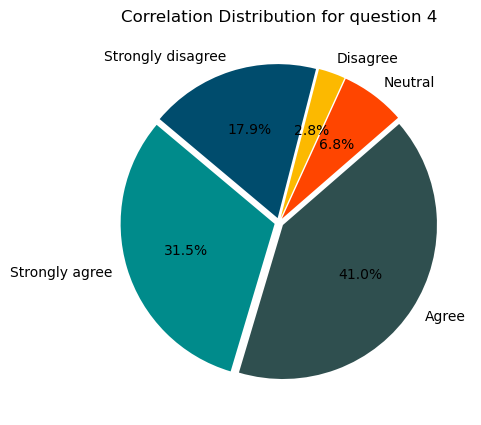

In [18]:
question4_counts = df['Question4'].value_counts(normalize=True) * 100
print(question4_counts)

labels = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree']
sizes = [31.5, 41, 6.8, 2.8, 17.9]  # Remaining percentage will be calculated
colors = ['#008B8B', '#2F4F4F', '#FF4500', '#fcb900','#004c6d']
explode = (0.03, 0.03, 0.03, 0.03, 0.03)
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Correlation Distribution for question 4')
plt.show()

Strongly Agree       50.393701
Agree                41.338583
Neutral               5.118110
Strongly Disagree     1.968504
Disagree              1.181102
Name: Question5, dtype: float64


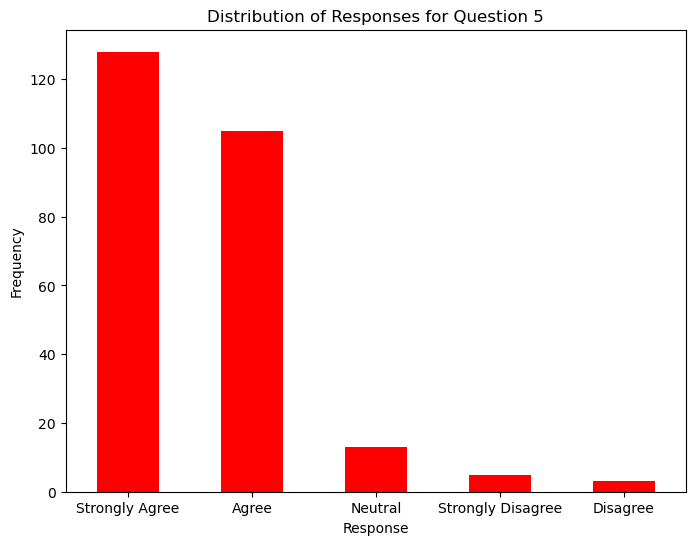

In [21]:
question5_counts = df['Question5'].value_counts(normalize=True) * 100
print(question5_counts)
plt.figure(figsize=(8, 6))
df['Question5'].value_counts().plot(kind='bar', color='red')
plt.title('Distribution of Responses for Question 5')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


Pearson Correlation Coefficient: 0.2417
P-Value: 0.0001

Reject the null hypothesis: There is a significant correlation.


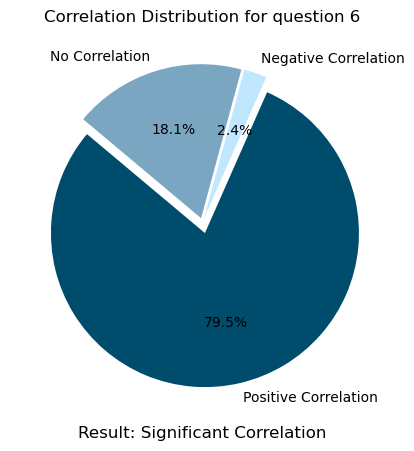

In [8]:
#Is there any significant correlation between tutoring duration and reported academic improvement

#H0:There is no significant correlation 
#H1:There is a significant correlation
pearson_corr, p_value = pearsonr(df['E6'], df['E15'])

print(f"Pearson Correlation Coefficient: {pearson_corr:.4f}")
print(f"P-Value: {p_value:.4f}")

# Hypothesis testing
alpha = 0.05

if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant correlation.")
else:
    print("\nFail to reject the null hypothesis: No significant correlation.")

labels = ['Positive Correlation', 'Negative Correlation', 'No Correlation']
sizes = [79.5, 2.4, 18.1]  # Remaining percentage will be calculated
colors = ['#004c6d', '#c1e7ff', '#7aa6c2']
explode = (0.07, 0.03, 0.03)
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Correlation Distribution for question 6')
result_text = f"\n\n\nResult: Significant Correlation"
plt.text(0, -1.2, result_text, horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.show()

Mismatched learning styles    40.551181
Time constraints              29.527559
Communication barriers        19.685039
Lack of preparation           10.236220
Name: Question7, dtype: float64


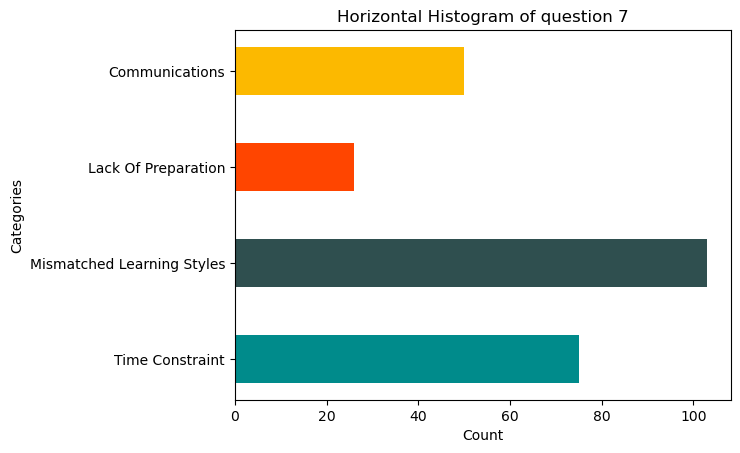

In [22]:
question7_counts = df['Question7'].value_counts(normalize=True) * 100
print(question7_counts)

categories = ['Time Constraint', 'Mismatched Learning Styles', 'Lack Of Preparation', 'Communications']
counts = [75, 103, 26, 50]
colors = ['#008B8B', '#2F4F4F', '#FF4500', '#fcb900']

# Create a horizontal histogram with narrow bars
plt.barh(categories, counts, color=colors, height=0.5)  # Adjust the height as needed

plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Horizontal Histogram of question 7')

# Show the plot
plt.show()

One-on-one sessions are more effective                      37.795276
Group sessions are more effective                           30.314961
Both one-on-one and group sessions are equally effective    29.527559
Structure has no significant impact                          2.362205
Name: Question12, dtype: float64


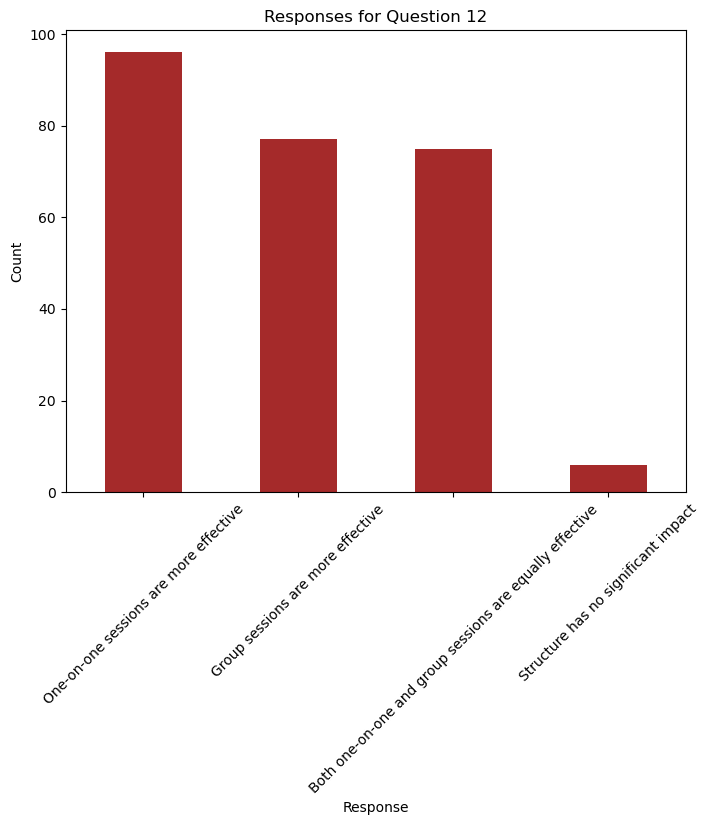

In [23]:
question12_counts = df['Question12'].value_counts(normalize=True) * 100
print(question12_counts)
plt.figure(figsize=(8, 6))
df['Question12'].value_counts().plot(kind='bar', color='brown')
plt.title('Responses for Question 12')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [49]:
total_yes_students = df[df['Question1'] == 'Yes'].shape[0]
percentage_positive = (df[(df['Question1'] == 'Yes') & (df['Question15'] == 'It is really accessible and helpful to me')].shape[0] / total_yes_students) * 100
percentage_neutral = (df[(df['Question1'] == 'Yes') & (df['Question15'] == 'It has its pros and cons, offering mixed effectiveness')].shape[0] / total_yes_students) * 100
percentage_negative = (df[(df['Question1'] == 'Yes') & (df['Question15'] == 'It is not effective to me at all')].shape[0] / total_yes_students) * 100

print(f"Percentage of 'Yes' responses in Question 15 - Positive: {percentage_positive:.2f}%")
print(f"Percentage of 'Yes' responses in Question 15 - Neutral: {percentage_neutral:.2f}%")
print(f"Percentage of 'Yes' responses in Question 15 - Negative: {percentage_negative:.2f}%")


Percentage of 'Yes' responses in Question 15 - Positive: 67.07%
Percentage of 'Yes' responses in Question 15 - Neutral: 30.12%
Percentage of 'Yes' responses in Question 15 - Negative: 2.81%


In [50]:
#What is the average reported academic improvement among students engaged in peer tutoring?

#H0: 50% students are engaged in peer tutoring
#H1: more than 50% students are engaged in peer tutoring
yes_count = df[df['Question1'] == 'Yes'].shape[0]
total_responses = df.shape[0]
sample_proportion = yes_count / total_responses

#Null hypo
null_hypothesis_proportion = 0.5

z_stat, p_value = proportions_ztest(yes_count, total_responses, null_hypothesis_proportion, alternative='larger')

print(f"Sample Proportion: {sample_proportion:.2%}")
print(f"Null Hypothesis Proportion: {null_hypothesis_proportion:.2%}")
print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The proportion of students engaged in peer tutoring is more than 50%.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest the proportion is more than 50%.")


Sample Proportion: 98.03%
Null Hypothesis Proportion: 50.00%
Z-Statistic: 55.1051
P-Value: 0.0000
Reject the null hypothesis: The proportion of students engaged in peer tutoring is more than 50%.


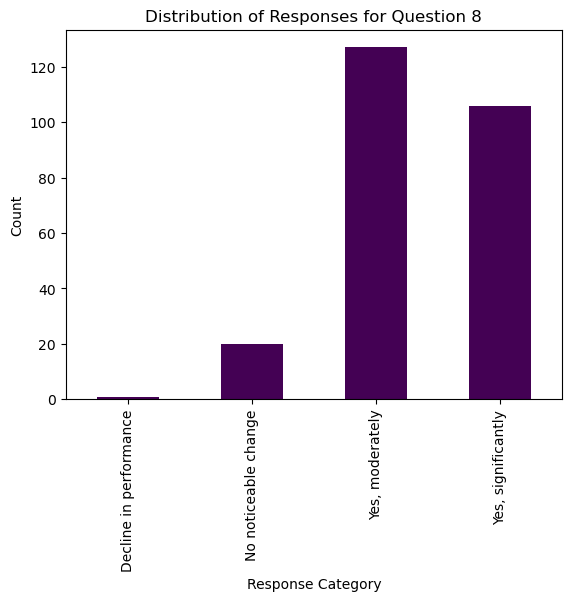

In [29]:
question7_counts = df['Question8'].value_counts().sort_index()
question7_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Responses for Question 8')
plt.xlabel('Response Category')
plt.ylabel('Count')
plt.show()


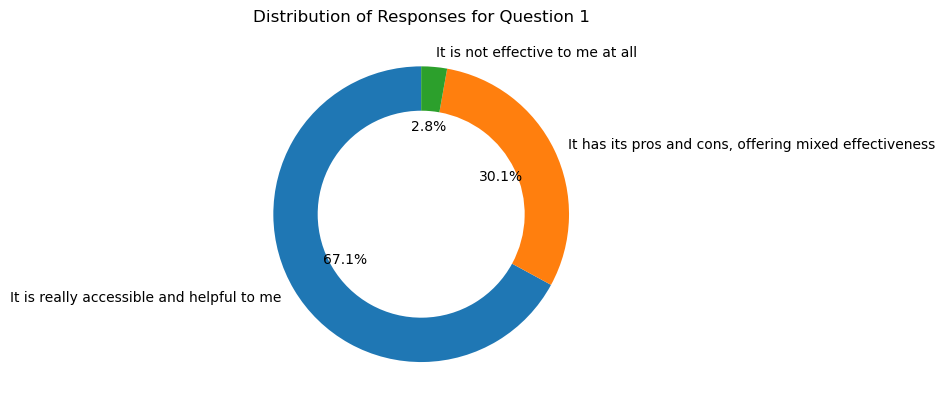

In [55]:
#Responses of students who are involved in peer tutoring
data_yes =df[df['Question1']=="Yes"]
question1_counts = data_yes['Question15'].value_counts()
plt.pie(question1_counts, labels=question1_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Distribution of Responses for Question 1')
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


Spearman Rank Correlation Coefficient: -0.2388
Spearman P-Value: 0.0001
Reject the null hypothesis: There is a significant Spearman rank correlation.


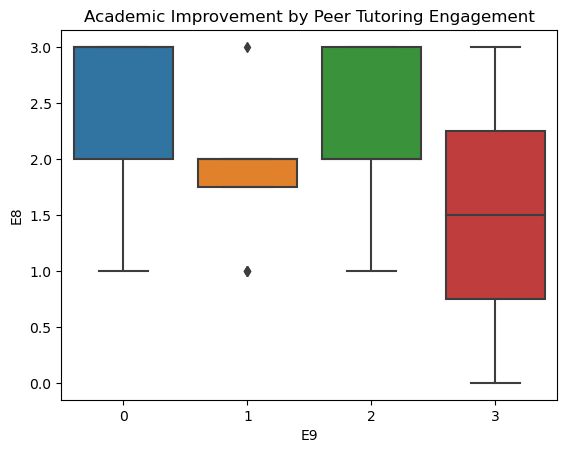

In [10]:
#Is there any correlation between student engagement and academic improvement.
#H0: There is not significant correlation between student engagement and academic improvement.
#H1: There is a significant correlation between student engagement and academic improvement.

spearman_corr, spearman_p_value = spearmanr(df['Question9'], df['Question8'])

print(f"Spearman Rank Correlation Coefficient: {spearman_corr:.4f}")
print(f"Spearman P-Value: {spearman_p_value:.4f}")

# Hypothesis testing
alpha = 0.05

if spearman_p_value < alpha:
    print("Reject the null hypothesis: There is a significant Spearman rank correlation.")
else:
    print("Fail to reject the null hypothesis: No significant Spearman rank correlation.")
sns.boxplot(x='E9', y='E8', data=df)
plt.title('Academic Improvement by Peer Tutoring Engagement')
plt.show()



Chi-Square Statistic: 12.17031474276111
P-Value: 0.016128695140140023

Results is: 
Reject the null hypothesis: There is a significant association between the tutor-tutee relationship and learning outcomes.


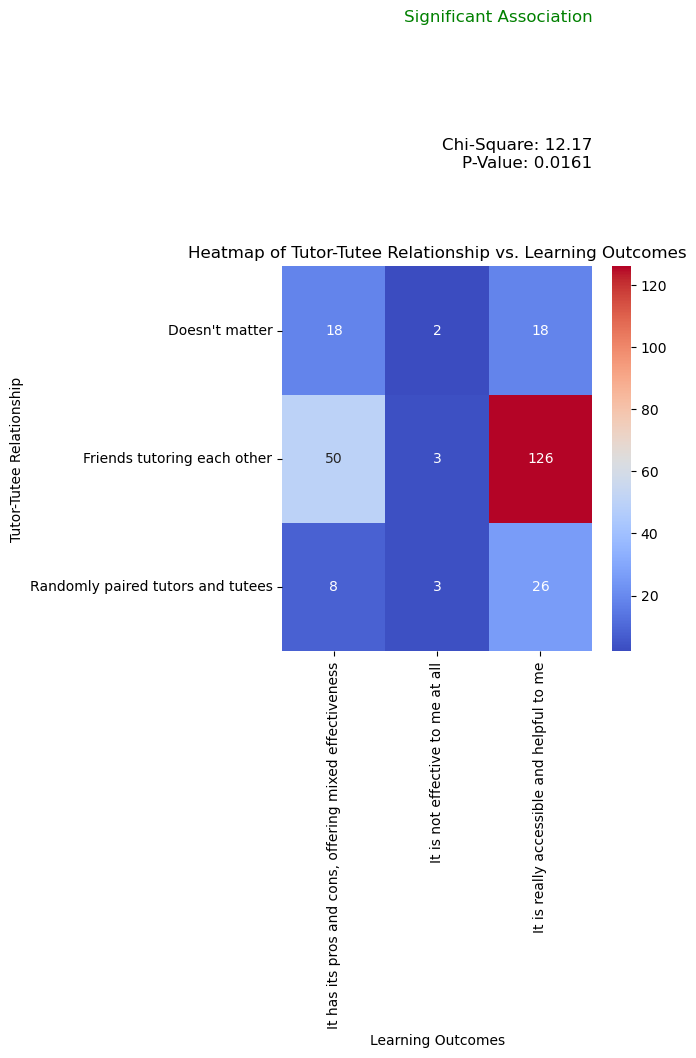

In [23]:
#H0:The tutor-tutee relationship is independent of learning outcomes.
#H1:There is a significant association between the tutor-tutee relationship and learning outcomes.

# Create a contingency table
contingency_table = pd.crosstab(df['Question13'], df['Question15'])

# Perform the Chi-Square Test for Independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

# Hypothesis testing
alpha = 0.05
print("\nResults is: ")
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between the tutor-tutee relationship and learning outcomes.")
else:
    print("Fail to reject the null hypothesis: The tutor-tutee relationship is independent of learning outcomes.")
    
plt.figure(figsize=(5, 5))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap of Tutor-Tutee Relationship vs. Learning Outcomes')
plt.xlabel('Learning Outcomes')
plt.ylabel('Tutor-Tutee Relationship')

plt.text(contingency_table.shape[1], -1, f'Chi-Square: {chi2_stat:.2f}\nP-Value: {p_value:.4f}',
         ha='right', va='top', fontsize=12)

test_result = "Significant Association" if p_value < alpha else "No Significant Association"
plt.text(contingency_table.shape[1], -2, test_result, ha='right', va='top',
         fontsize=12, color='green' if p_value < alpha else 'red')
plt.show()

# Machine Learning Model


In [17]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier  

X = df[['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']]
y = df['E15']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


report = classification_report(y_test, predictions, zero_division=0)
print("Classification Report:")
print(report)


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.36      0.45        14
           1       0.00      0.00      0.00         2
           2       0.77      0.94      0.85        35

    accuracy                           0.75        51
   macro avg       0.46      0.43      0.43        51
weighted avg       0.70      0.75      0.71        51

